<a href="https://colab.research.google.com/github/oshin-verma/data-/blob/main/chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('chatgpt_reviews.csv')

In [ ]:
df.head(5)

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5.0,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5.0,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5.0,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5.0,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5.0,2024-08-23 19:20:39


In [ ]:
df.isnull().sum()

,0
Review Id,0
Review,3
Ratings,1
Review Date,1


In [ ]:
df['Review']=df['Review'].astype(str).fillna('')

In [ ]:
#sentiment analysis

In [ ]:
from textblob import TextBlob

def get_sentiment(review):
    sentiment = TextBlob(review).sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment']=df['Review'].apply(get_sentiment)

In [71]:
sentiment_distribution=df['sentiment'].value_counts()

In [ ]:
# review analysis

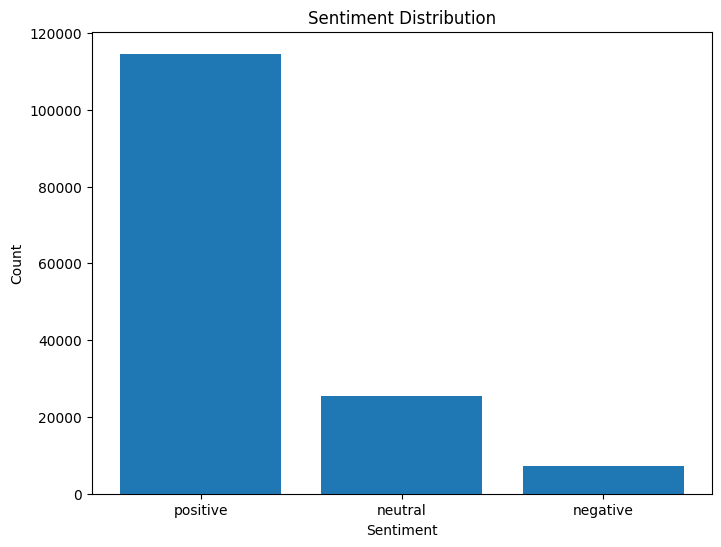

In [ ]:
plt.figure(figsize=(8,6))
x=sentiment_distribution.index
y=sentiment_distribution.values
plt.bar(x,y)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
#The majority of the reviews are positive, with a smaller proportion being neutral or negative.
#This suggests that most users have a favourable opinion of ChatGPT, though there is still a notable number of neutral and negative reviews.

In [ ]:
#Analyze what users like about chatgpt ,focus on extracting common phrases and keywords from reviews with positive sentiments.This will help identify features that users appreciate

In [ ]:
#I will proceed with following steps- 1)find review that has positive sentiment 2)extract common reviews and keywords from these positive reviews

In [ ]:
# filter reviews with positive sentiment
positive_reviews=df[df['sentiment']=='positive']['Review']

In [ ]:
#use counter vectorizer to extract common phrases
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(stop_words='english', max_features=5000) # Added import and corrected parameter and usage
X = vectorizer.fit_transform(positive_reviews)

In [ ]:
# sum the counts of each phrase
phrase_counts = X.sum(axis=0)

In [25]:
phrases = vectorizer.get_feature_names_out()

In [27]:
phrase_freq = [(phrases[i], phrase_counts[0, i]) for i in range(len(phrases))]

In [28]:
# sort phrases by frequency
phrase_freq = sorted(phrase_freq, key=lambda x: x[1], reverse=True)

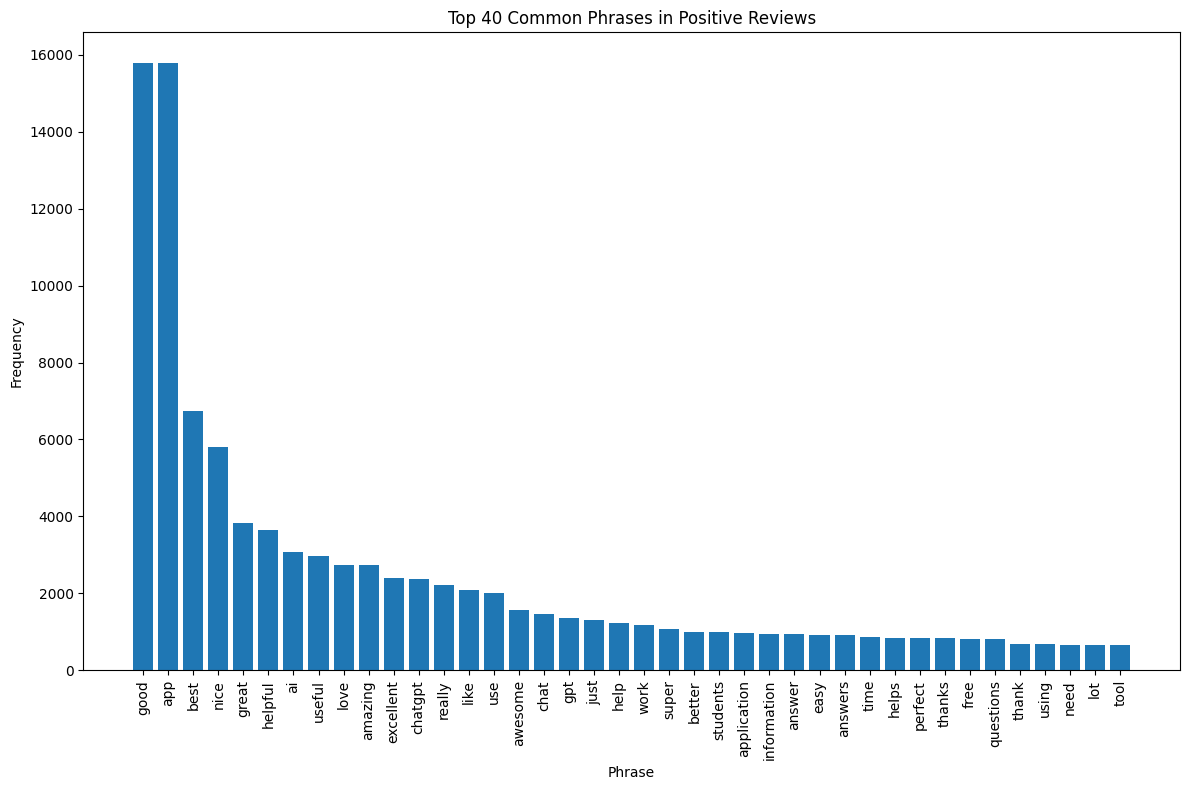

In [33]:
# Extract phrases and frequencies from the sorted list
# Let's plot the top 20 most frequent phrases for better readability
top_n = 40
phrases_to_plot = [item[0] for item in phrase_freq[:top_n]]
frequencies_to_plot = [item[1] for item in phrase_freq[:top_n]]

plt.figure(figsize=(12, 8)) # Increase figure size for better readability of many bars
plt.bar(phrases_to_plot, frequencies_to_plot)
plt.xlabel('Phrase')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Common Phrases in Positive Reviews')
plt.xticks(rotation=90) # Rotate x-axis labels to prevent overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
#we see phrases good , app, best,nice, great, helpful  mentioned in positive review.These sentiments suggest that ChatGPT is highly regarded for its usability, educational benefits, and AI-powered features.

In [ ]:
#Analyzing what users dont like about chatgpt. I will focus extracting common keywors and phrases used in negative reviews

In [35]:
negative_review=df[df['sentiment']=='negative']['Review']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(stop_words='english', max_features=5000) # Added import and corrected parameter and usage
X = vectorizer.fit_transform(negative_review)

In [37]:
phrase_counts=X.sum(axis=0)

In [38]:
phrases=vectorizer.get_feature_names_out()

In [40]:
phrase_frey=[(phrases[i],phrase_counts[0,i] )for i in range(len(phrases))]

In [41]:
phrase_freq=sorted(phrase_frey,key=lambda x:x[1],reverse=True)

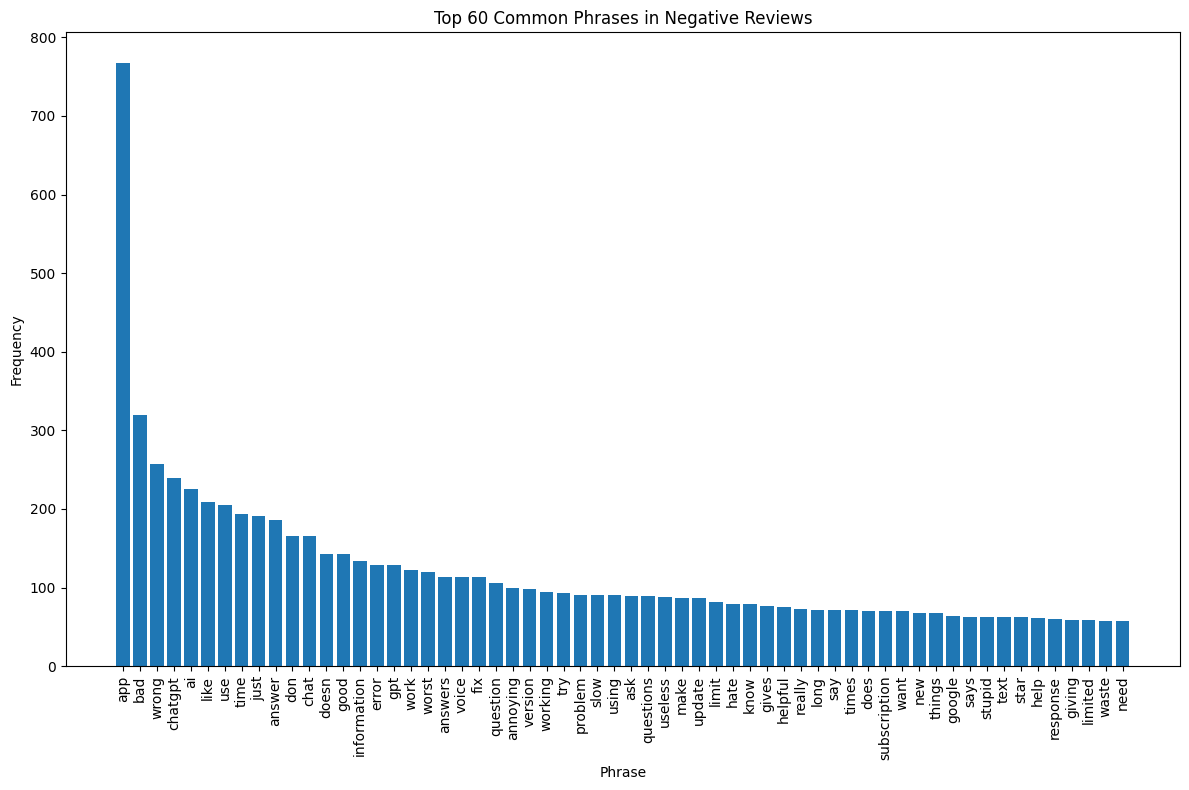

In [44]:
top_n=60
x=[item[0] for item in phrase_freq[:top_n]]
y=[item[1] for item in phrase_freq[:top_n]]
plt.figure(figsize=(12,8))
plt.bar(x,y)
plt.xlabel('Phrase')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Common Phrases in Negative Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#The visualization shows that users’ main complaints about ChatGPT include it being labelled as a “bad app” or
 with issues such as “doesn’t work”, “error occurred”, ” frequently mentioned
  in negative reviews. Users also express frustration with incorrect or misleading answers,
  technical problems like “error messages” and difficulty using specific features like voice chat problem


In [ ]:
These issues suggest that users are dissatisfied with the app’s reliability, accuracy, and overall performance.

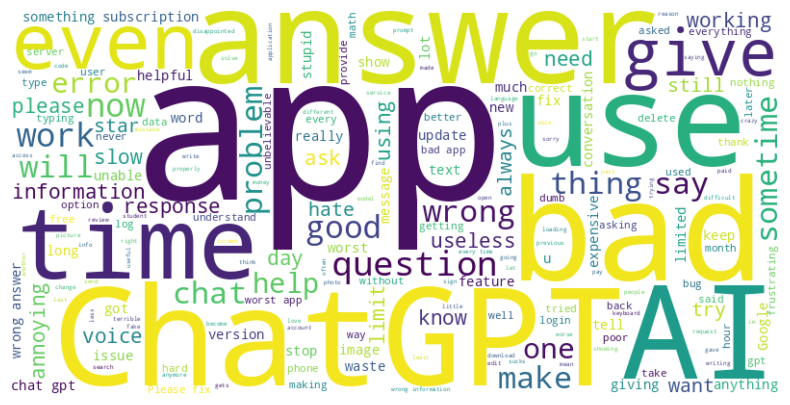

In [54]:

!pip install wordcloud matplotlib

# Import the WordCloud class
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_review)) # Generate a single wordcloud for all negative reviews

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
#  analyze how review changed over time. analyze trend of reviews. TO ANALYSE I WILL: 1)aggregate reviews by sentiment(Positive, Neutral, Negative) over time.
Visualize the trends in the volume of each sentiment type over time.

In [59]:
df['Review Date']=pd.to_datetime(df['Review Date'])
df.dropna(subset=['Review Date'] ,inplace=True)

In [64]:
sentiment_over_time=df.groupby([df['Review Date'].dt.to_period('M'),'sentiment']).size().unstack(fill_value=0)

In [65]:
sentiment_over_time.index=sentiment_over_time.index.to_timestamp( )

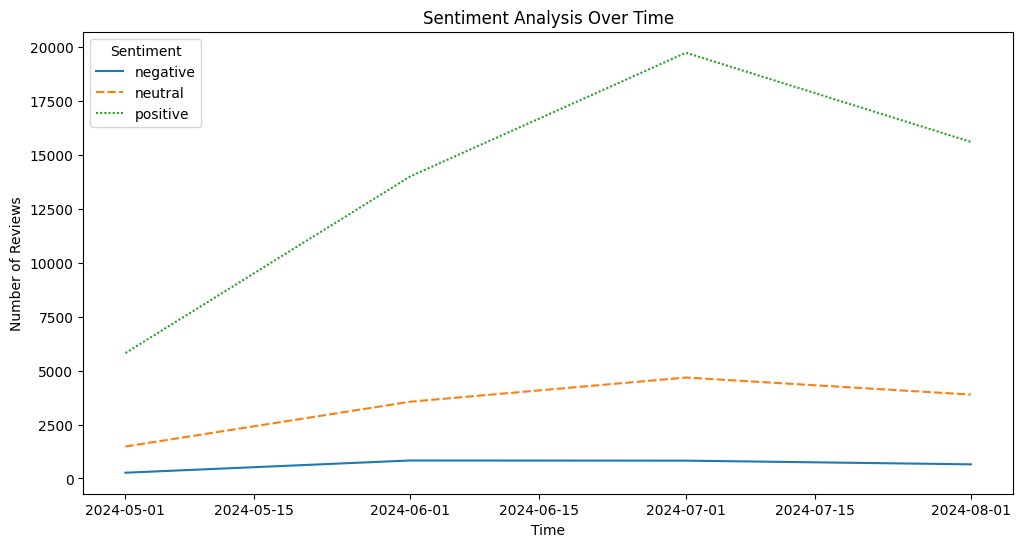

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_over_time)
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis Over Time')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
#the visualization show positive reviews have increased over time and reached its peak  between june to july
negative reviews remain contant with time
neutral reviews remain constant with time

In [ ]:
#Analyzing How Often Users Promote ChatGPT
Now, to finish this task on ChatGPT reviews analysis, we will analyze how often users promote ChatGPT.
 We will use the concept of Net Promoter Score here

In [72]:
# Calculate the total number of reviews
total_reviews = len(df)

# Calculate the number of reviews for each sentiment
positive_count = sentiment_distribution['positive']
neutral_count = sentiment_distribution['neutral']
negative_count = sentiment_distribution['negative']

# Calculate the percentage of each sentiment
promoter_percentage = (positive_count / total_reviews) * 100
passive_percentage = (neutral_count / total_reviews) * 100
detractor_percentage = (negative_count / total_reviews) * 100

# Calculate the NPS
nps_score = promoter_percentage - detractor_percentage

print(f"Promoter Percentage: {promoter_percentage:.2f}%")
print(f"Passive Percentage: {passive_percentage:.2f}%")
print(f"Detractor Percentage: {detractor_percentage:.2f}%")
print(f"Net Promoter Score (NPS): {nps_score:.2f}")

Promoter Percentage: 77.31%
Passive Percentage: 19.07%
Detractor Percentage: 3.62%
Net Promoter Score (NPS): 73.69


In [ ]:
#he Net Promoter Score (NPS) for ChatGPT, based on the ratings provided in the dataset, is approximately 64.35.
 It indicates a strong likelihood that users would recommend ChatGPT to others, as a score above 50 is
  generally considered excellent